# TFM: Puntos esperados en baloncesto

In [9]:
#Importar librerías
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import math
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Conectar con la base de datos

In [2]:
db_user = "postgres"
db_password = "Manturra14"
db_host = "localhost"
db_port = "5432"
db_name = "prueba"

connection_str = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_str)

In [3]:
query = "SELECT * FROM partidos"
partidos = pd.read_sql(query, engine)

# Muestra los datos de los partidos temporada, competicion, id, puntuacion y equipo local y visitante, jornada y alerta
partidos.head(5)

,id,competicion,temporada,puntuacion_local,puntuacion_visitante,equipo_local,equipo_visitante,jornada,alerta
0,13103789,1,3,95.0,79.0,4238,4230,1.0,False
1,13103779,1,3,95.0,73.0,4225,4240,1.0,False
2,13103781,1,3,79.0,88.0,4237,4233,1.0,False
3,13103778,1,3,97.0,92.0,4229,4232,1.0,False
4,13103777,1,3,101.0,70.0,4239,4234,1.0,False


### Cargar los diferentes dataframes cartatiro, jugadores y partidos

In [4]:
query = "SELECT * FROM carta_tiro"
cartatiro = pd.read_sql(query, engine)

# Muestra los datos de los jugadores nombre, equipo, dorsal, idjugador y posicion
cartatiro.head(5)


,partido,id,equipo,jugador,canasta,x,y,cuarto,tiempo,tipo,zona,accion,puntuacion_local,puntuacion_visitante,asistencia,reloj_posesion
0,13103789,1,4238,20209187,False,27.411,18.907,1,538,3,11,3-Point Shot Missed,0,0,False,2
1,13103789,2,4238,20211947,True,7.696,56.213,1,503,2,1,2-Point Shot Made,2,2,False,8
2,13103789,3,4238,20202163,True,30.111,64.787,1,471,3,10,3-Point Shot Made,5,4,False,8
3,13103789,4,4238,20211947,False,5.357,7.980,1,438,2,7,2-Point Shot Missed,5,7,False,8
4,13103789,5,4238,20212265,True,23.539,9.493,1,407,3,11,3-Point Shot Made,8,7,True,13


In [5]:
query = "SELECT * FROM jugadores"
jugadores = pd.read_sql(query, engine)

# Muestra los datos de los jugadores nombre, equipo, dorsal, idjugador y posicion
jugadores.head(5)

,id,dorsal,nombre,equipo,posicion
0,30001226,9.0,RUBEN PREY,4230,None
1,30001247,11.0,JORDI RODRIGUEZ,4230,None
2,20212073,21.0,MIGUEL ALLEN,4230,None
3,20213507,15.0,IKER GARMENDIA,4230,None
4,20211754,3.0,PEP BUSQUETS,4230,None


### Conteo de valores nulos en los diferentes dataframes

In [88]:
cartatiro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109329 entries, 0 to 109328
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   partido               109329 non-null  int64  
 1   id                    109329 non-null  int64  
 2   equipo                109329 non-null  int64  
 3   jugador               109329 non-null  int64  
 4   canasta               109329 non-null  bool   
 5   x                     109329 non-null  float64
 6   y                     109329 non-null  float64
 7   cuarto                109329 non-null  int64  
 8   tiempo                109329 non-null  int64  
 9   tipo                  109329 non-null  int64  
 10  zona                  109329 non-null  int64  
 11  accion                109329 non-null  object 
 12  puntuacion_local      109329 non-null  int64  
 13  puntuacion_visitante  109329 non-null  int64  
 14  asistencia            109329 non-null  bool   
 15  

In [10]:
cartatiro.columns

Index(['partido', 'id', 'equipo', 'jugador', 'canasta', 'x', 'y', 'cuarto',
       'tiempo', 'tipo', 'zona', 'accion', 'puntuacion_local',
       'puntuacion_visitante', 'asistencia', 'reloj_posesion'],
      dtype='object')

In [89]:
#Se observa que la variable posicion está vacía por lo que no es útil
jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1124 non-null   int64  
 1   dorsal    1124 non-null   float64
 2   nombre    1124 non-null   object 
 3   equipo    1124 non-null   int64  
 4   posicion  0 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 44.0+ KB


In [11]:
jugadores.columns

Index(['id', 'dorsal', 'nombre', 'equipo', 'posicion'], dtype='object')

In [8]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    702 non-null    int64  
 1   competicion           702 non-null    int64  
 2   temporada             702 non-null    int64  
 3   puntuacion_local      702 non-null    float64
 4   puntuacion_visitante  702 non-null    float64
 5   equipo_local          702 non-null    int64  
 6   equipo_visitante      702 non-null    int64  
 7   jornada               702 non-null    float64
 8   alerta                702 non-null    bool   
dtypes: bool(1), float64(3), int64(5)
memory usage: 44.7 KB


In [12]:
partidos.columns

Index(['id', 'competicion', 'temporada', 'puntuacion_local',
       'puntuacion_visitante', 'equipo_local', 'equipo_visitante', 'jornada',
       'alerta'],
      dtype='object')

### Análisis exploratorio de los datos

In [10]:
# Analizamos la variable objetivo: canasta
acciones=cartatiro['canasta'].value_counts()
print('Acciones con canasta: ',acciones[1])
print('Acciones sin canasta: ',acciones[0])
print('Porcentaje de acierto del total de las acciones: ',np.round(acciones[1]/(acciones[0]+acciones[1])*100,2),'%')

Acciones con canasta:  51714
Acciones sin canasta:  57615
Porcentaje de acierto del total de las acciones:  47.3 %


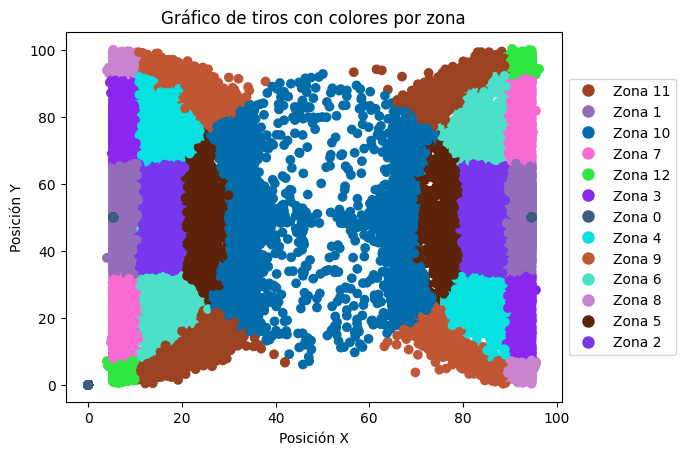

In [11]:
# Analizamos las 2 primeras variables importantes del df cartatiro
# Crear un diccionario de colores para cada valor único de la columna 'zona'
colores = {i: np.random.rand(3,) for i in cartatiro['zona'].unique()}

# Asignar colores a cada punto en función del valor de 'zona'
colors = [colores[z] for z in cartatiro['zona']]

# Graficar los puntos con colores diferentes para cada valor de 'zona'
plt.scatter(cartatiro['x'], cartatiro['y'], c=colors)
plt.xlabel('Posición X')
plt.ylabel('Posición Y')
plt.title('Gráfico de tiros con colores por zona')

# Crear una leyenda con los colores y las zonas asociadas
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Zona {key}', 
                              markerfacecolor=val, markersize=10) 
                   for key, val in colores.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [92]:
# Analizamos la variable cuarto respecto al objetivo
# Agrupar por zona y contar el número de True y False
grouped = cartatiro.groupby('cuarto')['canasta'].value_counts(normalize=True).unstack().fillna(0)

# Obtener el porcentaje de True sobre el total (True + False) para cada zona
grouped['porcentaje_true'] = grouped[True] * 100

print(grouped)

canasta     False      True  porcentaje_true
cuarto                                      
1        0.485823  0.514177        51.417689
2        0.487201  0.512799        51.279934
3        0.461261  0.538739        53.873946
4        0.460255  0.539745        53.974454
5        0.448052  0.551948        55.194805
6        0.403846  0.596154        59.615385


In [93]:
# Analizamos variable tiempo en segundos respecto al objetivo
# Agrupar por zona y contar el número de True y False
grouped = cartatiro.groupby('tiempo')['canasta'].value_counts(normalize=True).unstack().fillna(0)

# Obtener el porcentaje de True sobre el total (True + False) para cada zona
grouped['porcentaje_true'] = grouped[True] * 100

print(grouped)

canasta     False      True  porcentaje_true
tiempo                                      
0        0.722011  0.277989        27.798861
1        0.638150  0.361850        36.184971
2        0.539683  0.460317        46.031746
3        0.520101  0.479899        47.989950
4        0.500000  0.500000        50.000000
...           ...       ...              ...
596      0.764706  0.235294        23.529412
597      0.333333  0.666667        66.666667
598      0.727273  0.272727        27.272727
599      0.459459  0.540541        54.054054
600      0.173913  0.826087        82.608696

[601 rows x 3 columns]


In [94]:
# Analizamos la variable zona respecto al objetivo
# Agrupar por zona y contar el número de True y False
grouped = cartatiro.groupby('zona')['canasta'].value_counts(normalize=True).unstack().fillna(0)

# Obtener el porcentaje de True sobre el total (True + False) para cada zona
grouped['porcentaje_true'] = grouped[True] * 100

print(grouped)

canasta     False      True  porcentaje_true
zona                                        
0        0.254670  0.745330        74.533021
1        0.365287  0.634713        63.471317
2        0.583787  0.416213        41.621278
3        0.640279  0.359721        35.972134
4        0.634262  0.365738        36.573831
5        0.589404  0.410596        41.059603
6        0.635086  0.364914        36.491411
7        0.643953  0.356047        35.604665
8        0.596419  0.403581        40.358075
9        0.649186  0.350814        35.081424
10       0.663931  0.336069        33.606928
11       0.667535  0.332465        33.246483
12       0.618788  0.381212        38.121171


In [95]:
# Analizamos la variable tiro respecto al objetivo
# Agrupar por tiro y contar el número de True y False
grouped = cartatiro.groupby('tipo')['canasta'].value_counts(normalize=True).unstack().fillna(0)

# Obtener el porcentaje de True sobre el total (True + False) para cada tipo tiro
grouped['porcentaje_true'] = grouped[True] * 100

print(grouped)

canasta     False      True  porcentaje_true
tipo                                        
1        0.254670  0.745330        74.533021
2        0.461602  0.538398        53.839780
3        0.652597  0.347403        34.740345


In [96]:
# Analizamos variable accion para ver el tipo de tiro que existe
# Suponiendo que 'data' es tu DataFrame y 'columna' es el nombre de la columna que quieres analizar
valores_unicos = cartatiro['accion'].value_counts()
print("Cantidad de valores únicos en la columna:", valores_unicos)

Cantidad de valores únicos en la columna: accion
2-Point Shot Made       18810
2-Point Shot Missed     18480
3-Point Shot Missed     18116
Free Throw Made         15453
3-Point Shot Made        9594
Free Throw Missed        5285
Two Pointer              5145
Missed Three Pointer     4240
Missed Two Pointer       4143
Free Throw In            3620
Dunk                     2686
Three Pointer            2307
Free Throw Out           1232
Missed Dunk               218
Name: count, dtype: int64


Observar realmente la zona 0, tiros libres donde se encuentra en el mapa

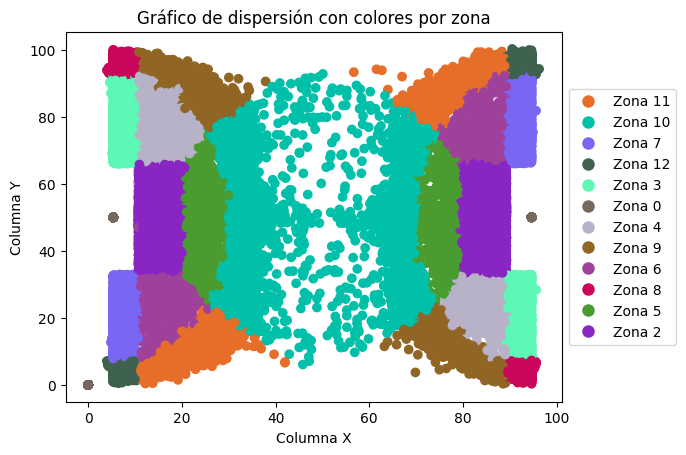

In [97]:
prueba=cartatiro[cartatiro['zona'].isin([0,2,3,4,5,6,7,8,9,10,11,12])]

# Crear un diccionario de colores para cada valor único de la columna 'zona'
colores = {i: np.random.rand(3,) for i in prueba['zona'].unique()}

# Asignar colores a cada punto en función del valor de 'zona'
colors = [colores[z] for z in prueba['zona']]

# Graficar los puntos con colores diferentes para cada valor de 'zona'
plt.scatter(prueba['x'], prueba['y'], c=colors)
plt.xlabel('Columna X')
plt.ylabel('Columna Y')
plt.title('Gráfico de dispersión con colores por zona')

# Crear una leyenda con los colores y las zonas asociadas
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Zona {key}', 
                              markerfacecolor=val, markersize=10) 
                   for key, val in colores.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Determinar posición en x de TL ya que el df lo ubica debajo del aro

In [57]:
a=prueba[prueba['zona']==2]
b=a[a['x']<=40]
c=b.sort_values(by=['x'])
c['x'].max()

20.707

In [18]:
# Analizamos variable reloj_posesion viendo que hay valores negativos
a=cartatiro[(cartatiro['reloj_posesion']<0)&(cartatiro['reloj_posesion']>-999)]
num_valores_diferentes = a['reloj_posesion'].unique()

print(f"El número de valores diferentes en la columna es: {num_valores_diferentes}")

El número de valores diferentes en la columna es: [  -1   -2   -4  -12   -5   -3   -7   -9  -11   -6  -16  -31   -8  -14
  -10  -20 -178  -26  -13  -18  -21  -15  -17  -23  -48  -46  -37  -38
  -42  -40  -27  -28  -22  -29  -47  -41  -19  -56  -57  -36  -52  -53
  -32  -25  -34  -24  -50  -92 -105  -49  -77  -51  -30  -43  -55  -33
  -35  -58  -45  -67  -61  -44  -63 -321 -114]


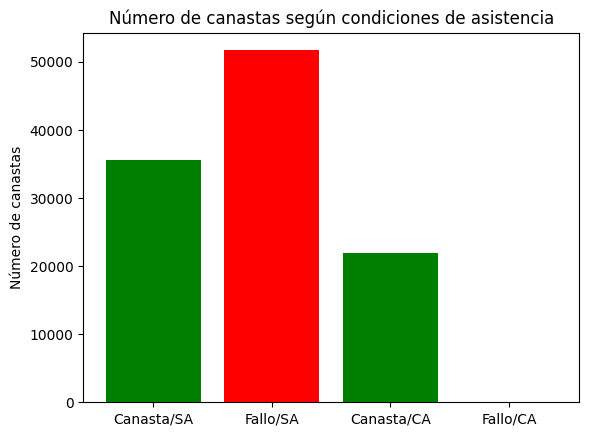

In [98]:
# Analizamos variable asistencia
# Suponiendo que 'data' es tu DataFrame
data = cartatiro  # Si los datos están en un archivo CSV

# Crear un filtro para cada condición
true_without_assist = (data['canasta'] == True) & (data['asistencia'] == False)
false_without_assist = (data['canasta'] == False) & (data['asistencia'] == False)
true_with_assist = (data['canasta'] == True) & (data['asistencia'] == True)
false_with_assist = (data['canasta'] == False) & (data['asistencia'] == True)

# Contar el número de ocurrencias para cada filtro
count_true_without_assist = data[true_without_assist].shape[0]
count_false_without_assist = data[false_without_assist].shape[0]
count_true_with_assist = data[true_with_assist].shape[0]
count_false_with_assist = data[false_with_assist].shape[0]

# Crear la gráfica
fig, ax = plt.subplots()

# Graficar barras verdes y rojas
bars = ax.bar([0, 1, 2, 3], [count_true_without_assist, count_false_without_assist, count_true_with_assist, count_false_with_assist],
              color=['green', 'red', 'green', 'red'])

# Etiquetas y título
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['Canasta/SA', 'Fallo/SA', 'Canasta/CA', 'Fallo/CA'])
ax.set_ylabel('Número de canastas')
ax.set_title('Número de canastas según condiciones de asistencia')

# Mostrar la gráfica
plt.show()

In [99]:
#La variable asistencia solo es True en 24 ocasiones cuando canasta es False
cartatiro[(data['canasta'] == False) & (data['asistencia'] == True)].shape[0]

29

Canastas sin asistencia por zona:
0     16845
1      9994
2      3210
3       328
4       532
5       710
6       536
7       362
8        55
9       613
10     1822
11      588
12       50
Name: canasta, dtype: int64

Canastas con asistencia por zona:
0     2228
1     8605
2     1375
3      240
4      164
5      344
6      165
7      218
8     1027
9     1929
10    2641
11    1964
12    1070
Name: canasta, dtype: int64


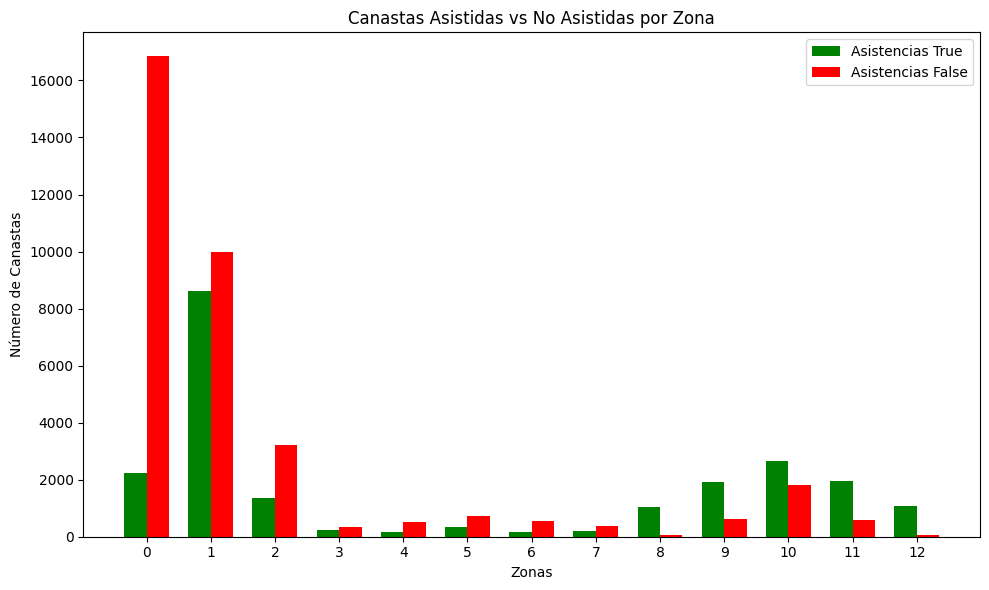

In [100]:
# Analizamos la variable asistencia junto al objetivo y por zona
# Contar el número de canastas cuando la asistencia es False por zona
canastas_sin_asistencia = cartatiro[cartatiro['asistencia'] == False].groupby('zona')['canasta'].sum()

# Contar el número de canastas cuando la asistencia es True por zona
canastas_con_asistencia = cartatiro[cartatiro['asistencia'] == True].groupby('zona')['canasta'].sum()

# Crear un rango de zonas del 0 al 12
zonas = pd.Series(range(13))

# Asegurar que todas las zonas estén presentes y rellenar los valores faltantes con 0
canastas_sin_asistencia = canastas_sin_asistencia.reindex(zonas, fill_value=0)
canastas_con_asistencia = canastas_con_asistencia.reindex(zonas, fill_value=0)

# Mostrar el número de canastas por zona según la asistencia
print("Canastas sin asistencia por zona:")
print(canastas_sin_asistencia)

print("\nCanastas con asistencia por zona:")
print(canastas_con_asistencia)


# Suponiendo que tienes dos DataFrames: df_asistencias_true y df_asistencias_false
# Reemplaza estos nombres con los de tus DataFrames

# Datos de ejemplo para representar las 13 zonas
zonas = np.arange(0, 13)  # Zonas del 1 al 13

# Ancho de las barras
bar_width = 0.35

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar barras para las canastas asistidas
bar1 = ax.bar(zonas - bar_width/2, canastas_con_asistencia, bar_width, color='green', label='Asistencias True')

# Graficar barras para las canastas no asistidas
bar2 = ax.bar(zonas + bar_width/2, canastas_sin_asistencia, bar_width, color='red', label='Asistencias False')

# Configurar título y etiquetas de los ejes
ax.set_title('Canastas Asistidas vs No Asistidas por Zona')
ax.set_xlabel('Zonas')
ax.set_ylabel('Número de Canastas')
ax.set_xticks(zonas)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Transformación de df

In [6]:
# Eliminar variables que no van a ser utilizadas y renombrar variable para luego cruzar con otro df
partidos = partidos.rename(columns={'id': 'partido'})

partidos=partidos.drop(columns=['competicion', 'temporada', 'puntuacion_local',
       'puntuacion_visitante', 'jornada','alerta'],axis=True)

In [7]:
# Eliminar variables que no van a ser utilizadas, renombrar variable para cruzar con otro df y renombrar jugadores
jugadores= jugadores.rename(columns={'id': 'jugador'})
jugadores = jugadores.drop(columns=['equipo','posicion','dorsal'],axis=1)
jugadores.loc[jugadores['nombre'] == 'IFTAH ZIV', 'nombre'] = 'YIFTACH ZIV'
jugadores.loc[jugadores['nombre'] == 'EDY TAVARES', 'nombre'] = 'WALTER TAVARES'
jugadores.loc[jugadores['nombre'] == 'NIKOLAOS ROGKAVOPOULOUS', 'nombre'] = 'NIKOS ROGKAVOPOULOUS'
jugadores.loc[jugadores['nombre'] == 'NICO MANNION', 'nombre'] = 'NICOLLO MANNION'
jugadores.loc[jugadores['nombre'] == 'RUBEN LOPEZ DE LA TORRE', 'nombre'] = 'RUBEN LOPEZ'
jugadores.loc[jugadores['nombre'] == 'NICOLAS LAPROVITTOLA', 'nombre'] = 'NICO LAPROVITTOLA'
jugadores.loc[jugadores['nombre'] == 'MATTHEW COSTELLO', 'nombre'] = 'MATT COSTELLO'
jugadores.loc[jugadores['nombre'] == 'ELI JOHN NDIAYE', 'nombre'] = 'ELI NDIAYE'
jugadores.loc[jugadores['nombre'] == 'FACUNDO CAMPAZZO', 'nombre'] = 'FACU CAMPAZZO'
jugadores.loc[jugadores['nombre'] == 'NICOLAS BRUSSINO', 'nombre'] = 'NICO BRUSSINO'
jugadores.loc[jugadores['nombre'] == 'ALEXANDER BALCEROWSKI', 'nombre'] = 'OLEK BALCEROWSKI'

In [8]:
#Eliminar variables que no serán utilziadas
df=cartatiro.drop(columns=['id','asistencia'],axis=1)

In [9]:
# Mejorar variable reloj_posesion
def procesar_base(df):
    bases_modificadas = []  # Lista para almacenar las bases modificadas
    for i in range(df['partido'].nunique()):
        matchids = df['partido'].unique()
        match = matchids[i]
        base = df[df['partido'] == match]
        for z in range(base['cuarto'].nunique()):
            cuartos = base['cuarto'].unique()
            cuarto = cuartos[z]
            basec = base[base['cuarto'] == cuarto]
            basec = basec.sort_values('tiempo', ascending=False)
            for j in range(len(basec)):
                if j == 0:
                    if cuarto < 5:
                        pos = 600 - basec.iloc[j, 7]
                        while pos>24:
                            pos += -10
                    else:
                        pos = 300 - basec.iloc[j, 7]
                        while pos>24:
                            pos+=-10
                else:
                    pos = basec.iloc[j - 1, 7] - basec.iloc[j, 7]
                    while pos>24:
                        pos += -5
                basec.iloc[j, -1] = pos
            bases_modificadas.append(basec.copy())  # Agregar la base modificada a la lista
    
    # Concatenar todas las bases modificadas en un nuevo DataFrame
    df_modificado = pd.concat(bases_modificadas, ignore_index=True)
    return df_modificado

# Crear una copia de la base de datos original
df_modificada = procesar_base(df.copy())
df_modificada.loc[df_modificada['zona']==0,'reloj_posesion']=-1000

In [10]:
# Unir dfs cartatiro y equipo para crear nueva variable local y mejorar variable diferencia
# Realizar el merge de los DataFrames
merged_df = pd.merge(df_modificada, partidos, on='partido')

# Calcular la variable 'local' (True o False) en función del equipo del primer DataFrame
merged_df['local'] = merged_df['equipo'] == merged_df['equipo_local']

# Calcular la variable 'diferencia'
merged_df['diferencia'] = merged_df['puntuacion_local'] - merged_df['puntuacion_visitante']

for i in range(len(merged_df)):
    if merged_df.iloc[i,3]==True & merged_df.iloc[i,-2]==True:
        merged_df.iloc[i,-1]=merged_df.iloc[i,-1]-merged_df.iloc[i,6]
    elif merged_df.iloc[i,3]==True and merged_df.iloc[i,-2]==False:
        merged_df.iloc[i,-1]=merged_df.iloc[i,-1]+merged_df.iloc[i,6]
    else:
        continue
merged_df.head(5)

,partido,equipo,jugador,canasta,x,y,cuarto,tiempo,tipo,zona,accion,puntuacion_local,puntuacion_visitante,reloj_posesion,equipo_local,equipo_visitante,local,diferencia
0,13103789,4230,30002731,False,77.450,87.473,1,560,3,11,3-Point Shot Missed,0,0,20,4238,4230,False,0
1,13103789,4238,20209187,False,27.411,18.907,1,538,3,11,3-Point Shot Missed,0,0,22,4238,4230,True,0
2,13103789,4230,20202172,True,94.643,46.973,1,519,2,1,2-Point Shot Made,0,2,19,4238,4230,False,-1
3,13103789,4238,20211947,True,7.696,56.213,1,503,2,1,2-Point Shot Made,2,2,16,4238,4230,True,-1
4,13103789,4230,30002731,True,94.643,56.047,1,487,2,1,2-Point Shot Made,2,4,16,4238,4230,False,-1


In [11]:
#Eliminar variables ya utilizadas que no se aplicarán al algoritmo
prueba=merged_df.drop(columns=[
       'puntuacion_local', 'puntuacion_visitante',
       'equipo_local', 'equipo_visitante'],axis=1)
prueba.head(5)

,partido,equipo,jugador,canasta,x,y,cuarto,tiempo,tipo,zona,accion,reloj_posesion,local,diferencia
0,13103789,4230,30002731,False,77.450,87.473,1,560,3,11,3-Point Shot Missed,20,False,0
1,13103789,4238,20209187,False,27.411,18.907,1,538,3,11,3-Point Shot Missed,22,True,0
2,13103789,4230,20202172,True,94.643,46.973,1,519,2,1,2-Point Shot Made,19,False,-1
3,13103789,4238,20211947,True,7.696,56.213,1,503,2,1,2-Point Shot Made,16,True,-1
4,13103789,4230,30002731,True,94.643,56.047,1,487,2,1,2-Point Shot Made,16,False,-1


In [12]:
# Cambiar el signo de 'diferencia' cuando 'local' es False
prueba.loc[~prueba['local'], 'diferencia'] = prueba.loc[~prueba['local'], 'diferencia'] * -1
prueba.head(5)

,partido,equipo,jugador,canasta,x,y,cuarto,tiempo,tipo,zona,accion,reloj_posesion,local,diferencia
0,13103789,4230,30002731,False,77.450,87.473,1,560,3,11,3-Point Shot Missed,20,False,0
1,13103789,4238,20209187,False,27.411,18.907,1,538,3,11,3-Point Shot Missed,22,True,0
2,13103789,4230,20202172,True,94.643,46.973,1,519,2,1,2-Point Shot Made,19,False,1
3,13103789,4238,20211947,True,7.696,56.213,1,503,2,1,2-Point Shot Made,16,True,-1
4,13103789,4230,30002731,True,94.643,56.047,1,487,2,1,2-Point Shot Made,16,False,1


In [13]:
#Tiro libre de debajo del aro a la linea del Tiro libre
prueba.loc[prueba['zona']==0,'x']=20.707
prueba.loc[prueba['zona']==0,'y']=50.00

In [14]:
#Invertir el lado derecho al lado izquierdo y luego el eje y hacia arriba para solo tener un cuadrante del campo
prueba.loc[prueba['x'] > 50, 'y'] = 100 - prueba['y']
prueba.loc[prueba['x'] > 50, 'x'] = 100 - prueba['x']
#prueba.loc[prueba['y'] < 50, 'y'] = 50 + prueba['y']

In [15]:
# Poner la media en estas zonas del campo ya que se han encontrado valores 0 en x e y, lo cual indica que esta mal
mediax2 = prueba.loc[prueba['zona'] == 2, 'x'].mean()
mediay2 = prueba.loc[prueba['zona'] == 2, 'y'].mean()
mediax3 = prueba.loc[prueba['zona'] == 3, 'x'].mean()
mediay3 = prueba.loc[prueba['zona'] == 3, 'y'].mean()
mediax12 = prueba.loc[prueba['zona'] == 12, 'x'].mean()
mediay12 = prueba.loc[prueba['zona'] == 12, 'y'].mean()

prueba.loc[(prueba['x']==0)&(prueba['y']==0)&(prueba['zona']==2),['x','y']]=mediax2,mediay2

prueba.loc[(prueba['x']==0)&(prueba['y']==0)&(prueba['zona']==3),['x','y']]=mediax3,mediay3

prueba.loc[(prueba['x']==0)&(prueba['y']==0)&(prueba['zona']==12),['x','y']]=mediax12,mediay12

In [16]:
# Crear variable distancia con los puntos inicial y el de tiro
# Punto inicial
x_inicial, y_inicial = 5.76, 50
# Calculando la distancia para cada fila y creando una nueva columna 'distancia'
prueba['distancia'] = prueba.apply(lambda row: math.sqrt((row['x'] - x_inicial)**2 + (row['y'] - y_inicial)**2), axis=1)

In [17]:
# Calcular el ángulo y crear la nueva columna "angulo"
proba=prueba.copy()
proba['angulo'] = proba.apply(lambda row: math.degrees(math.atan2(row['y'] - y_inicial, row['x'] - x_inicial)), axis=1)

proba.loc[proba['angulo']==180,'angulo']=0

proba.loc[proba['angulo']>95,'angulo']-=90

proba['angulo'] = proba['angulo'].apply(lambda x: -x if x < 0 else x)

In [18]:
# Función para asignar valores a la nueva columna 'tiro' basada en la columna 'zona' mejorando asi la variable tipo
def asignar_tiro(valor, accion):
    if valor in [8, 9, 10, 11, 12]:
        return 'triple'
    elif valor in [2,3, 4, 5, 6, 7]:
        return 'doble'
    elif valor == 1 and accion in ['Dunk', 'Missed Dunk']:
        return 'mate'
    elif valor == 0:
        return 'TL'
    else:
        return 'zona'

# Crear la nueva columna 'tiro' aplicando la función a la columna 'zona'
proba['tiro'] = proba.apply(lambda x: asignar_tiro(x['zona'], x['accion']), axis=1)

In [19]:
# Agrupar por tiro y contar el número de True y False
grouped = proba.groupby('tiro')['canasta'].value_counts(normalize=True).unstack().fillna(0)

# Obtener el porcentaje de True sobre el total (True + False) para cada zona
grouped['porcentaje_true'] = grouped[True] * 100

print(grouped)

canasta     False      True  porcentaje_true
tiro                                        
TL       0.254670  0.745330        74.533021
doble    0.603008  0.396992        39.699248
mate     0.075069  0.924931        92.493113
triple   0.652317  0.347683        34.768339
zona     0.397212  0.602788        60.278798


In [20]:
# Unir df de cartatiro y jugadores
bd=pd.merge(proba, jugadores, on='jugador')
bd=bd.drop_duplicates()
bbdd=bd.drop(columns=['zona','accion','jugador'])
bbdd.head(5)

,partido,equipo,canasta,x,y,cuarto,tiempo,tipo,reloj_posesion,local,diferencia,distancia,angulo,tiro,nombre
0,13103789,4230,False,22.550,12.527,1,560,3,20,False,0,41.062511,65.864951,triple,ANDREW ANDREWS
1,13103789,4230,True,5.357,43.953,1,487,2,16,False,1,6.060414,93.812817,zona,ANDREW ANDREWS
2,13103789,4230,True,24.711,83.787,1,454,3,17,False,1,38.738892,60.712099,triple,ANDREW ANDREWS
3,13103789,4230,False,5.357,83.620,1,306,2,20,False,1,33.622415,90.686767,doble,ANDREW ANDREWS
4,13103789,4230,False,24.350,17.060,1,271,3,17,False,2,37.823692,60.561380,triple,ANDREW ANDREWS


In [21]:
# Crear columnas de rating tiro para cada jugador
# Contar True por jugador y por tiro
true_count = bd[bd['canasta'] == True].groupby(['nombre', 'tiro']).size().reset_index(name='true_count')

# Contar False por jugador y por tiro
false_count = bd[bd['canasta'] == False].groupby(['nombre', 'tiro']).size().reset_index(name='false_count')

# Fusionar los recuentos de True y False
merged = pd.merge(true_count, false_count, on=['nombre', 'tiro'], how='outer').fillna(0)

# Evitar divisiones por cero
merged['false_count'] = merged['false_count'].replace(0, 1)

# Calcular el rating por tiro para cada jugador
merged['rating'] = (merged['true_count'] / merged['false_count'])*(merged['true_count'] + merged['false_count'])

# Crear el DataFrame final con la estructura requerida
result = merged.pivot(index='nombre', columns='tiro', values='rating').add_prefix('rating_')

# Reiniciar el índice para obtener una columna 'jugador'
result = result.reset_index()
result = result.fillna(0.00)

In [22]:
# PCA y Kclustering para agrupar el estilo ofensivo de los jugadores
dft = result.copy()

# Separar los nombres de los jugadores
nombres_jugadores = dft['nombre']
# Quitar la columna de nombres para el análisis
dft = dft.drop('nombre', axis=1)

# Realizar PCA con 3 componentes
pca = PCA(n_components=3)
componentes_principales = pca.fit_transform(dft)

# Crear un DataFrame con las dos primeras componentes principales
df_pca = pd.DataFrame(data=componentes_principales, columns=['Componente_1', 'Componente_2','Componente_3'])

# Realizar el clustering (por ejemplo, K-Means con 3 clusters)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(dft)

# Obtener las etiquetas de cluster para cada jugador
etiquetas_clusters = kmeans.labels_
result['cluster']=etiquetas_clusters

C:\Users\cquin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\cquin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\cquin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\cquin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

C:\Users\cquin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\cquin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\cquin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\cquin\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed

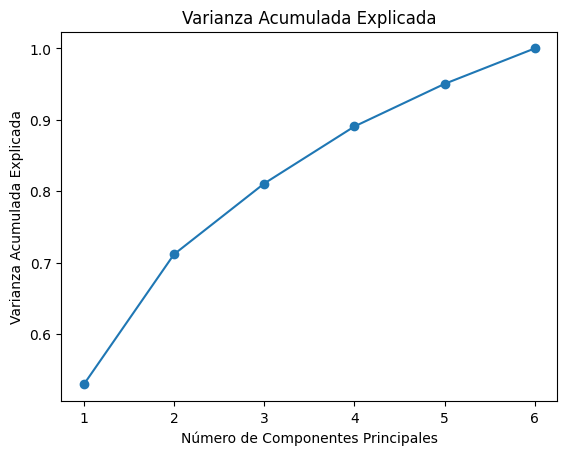

In [23]:
# Graficar la varianza acumuluda según pc
# Estandarizar los datos (opcional pero recomendado para PCA)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(result.iloc[:,1:])

# Aplicar PCA
pca = PCA()
pca.fit(df_scaled)

# Obtener las componentes principales y la varianza explicada
principal_components = pca.transform(df_scaled)
explained_variance = pca.explained_variance_ratio_

# Calcular la varianza acumulada explicada
cumulative_explained_variance = np.cumsum(explained_variance)

# Graficar la varianza acumulada explicada
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Varianza Acumulada Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.show()

In [24]:
# Función para asignar valores a la nueva columna 'tiro' basada en la columna 'zona'
def asignar_tiro(cluster):
    if cluster == 3:
        return 'tirador'
    elif cluster == 1:
        return 'jugador promedio'
    elif cluster == 2:
        return 'interior puro'
    elif cluster == 4:
        return 'todoterreno'
    else:
        return 'no ofensivo'

# Crear la nueva columna 'tiro' aplicando la función a la columna 'zona'
result['estilo'] = result.apply(lambda x: asignar_tiro(x['cluster']), axis=1)

In [25]:
# Agrupar por 'grupo' y calcular estadísticas
resultados = result.groupby('estilo').agg({
    'rating_TL': [np.mean, np.std, np.max, np.min],
    'rating_zona': [np.mean, np.std, np.max, np.min],
    'rating_doble': [np.mean, np.std, np.max, np.min],
    'rating_mate': [np.mean, np.std, np.max, np.min],
    'rating_triple': [np.mean, np.std, np.max, np.min]
})

# Renombrar las columnas para mayor claridad
resultados.columns = ['tiro_TL_promedio', 'tiro_TL_desviacion', 'tiro_TL_maximo', 'tiro_TL_minimo',
                      'tiro_zona_promedio', 'tiro_zona_desviacion', 'tiro_zona_maximo', 'tiro_zona_minimo',
                      'tiro_doble_promedio', 'tiro_doble_desviacion', 'tiro_doble_maximo', 'tiro_doble_minimo',
                      'tiro_mate_promedio', 'tiro_mate_desviacion', 'tiro_mate_maximo', 'tiro_mate_minimo',
                      'tiro_triple_promedio', 'tiro_triple_desviacion', 'tiro_triple_maximo', 'tiro_triple_minimo',
                     ]


C:\Users\cquin\AppData\Local\Temp\ipykernel_15932\3000776402.py:2: FutureWarning: The provided callable <function mean at 0x000001B7A2D5D360> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  resultados = result.groupby('estilo').agg({
C:\Users\cquin\AppData\Local\Temp\ipykernel_15932\3000776402.py:2: FutureWarning: The provided callable <function std at 0x000001B7A2D5D510> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  resultados = result.groupby('estilo').agg({
C:\Users\cquin\AppData\Local\Temp\ipykernel_15932\3000776402.py:2: FutureWarning: The provided callable <function amax at 0x000001B7A2D5C790> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pa

In [161]:
#PROMEDIOS
resultados.iloc[:,[0,4,8,12,16]]

,tiro_TL_promedio,tiro_zona_promedio,tiro_doble_promedio,tiro_mate_promedio,tiro_triple_promedio
estilo,,,,,
interior puro,571.363997,346.792098,110.351372,2100.333333,1.875000
jugador promedio,292.163631,125.432434,35.495046,85.922936,53.074241
no ofensivo,44.272352,31.713465,11.547393,9.367457,13.509166
tirador,797.548479,183.071381,69.822766,58.705128,100.399851
todoterreno,261.473682,154.327598,36.824724,864.766154,22.869212


In [162]:
#STD
resultados.iloc[:,[1,5,9,13,17]]

,tiro_TL_desviacion,tiro_zona_desviacion,tiro_doble_desviacion,tiro_mate_desviacion,tiro_triple_desviacion
estilo,,,,,
interior puro,572.270570,165.719323,64.512094,377.466996,2.839454
jugador promedio,115.079867,82.919917,27.952959,123.930106,42.900324
no ofensivo,46.828839,39.314659,15.575408,35.150005,20.449868
tirador,257.649432,125.493559,67.923751,122.026406,65.078164
todoterreno,178.542589,78.148473,47.282110,291.455902,40.057332


In [163]:
# MAXIMOS 
resultados.iloc[:,[2,6,10,14,18]]

,tiro_TL_maximo,tiro_zona_maximo,tiro_doble_maximo,tiro_mate_maximo,tiro_triple_maximo
estilo,,,,,
interior puro,1409.454545,551.189189,205.532609,2550.0,6.000000
jugador promedio,530.400000,403.106557,147.281553,462.0,215.861345
no ofensivo,210.000000,294.000000,105.450000,306.0,198.389610
tirador,1673.200000,594.926667,359.742331,506.0,270.446281
todoterreno,559.027778,373.920000,188.000000,1360.0,139.626667


In [164]:
#MINIMOS
resultados.iloc[:,[3,7,11,15,19]]

,tiro_TL_minimo,tiro_zona_minimo,tiro_doble_minimo,tiro_mate_minimo,tiro_triple_minimo
estilo,,,,,
interior puro,186.642857,157.297297,62.195122,1703.333333,0.000000
jugador promedio,96.000000,2.571429,0.000000,0.000000,0.000000
no ofensivo,0.000000,0.000000,0.000000,0.000000,0.000000
tirador,525.214286,16.666667,4.000000,0.000000,2.285714
todoterreno,69.925926,30.281250,5.000000,506.000000,0.000000


In [26]:
result=result.drop(columns=['estilo'],axis=1)

In [27]:
# Unir df de ratings con el transformado
experimento=pd.merge(bbdd,result,on='nombre')

In [28]:
#Ordenar segun partido, cuarto y tiempo para crear nueva variable canasta anterior
a=experimento.sort_values(by=['partido','cuarto', 'tiempo'], ascending=[True, True, False])
df = a.copy()

# Añadir la columna "canasta_anterior"
df['canasta_anterior'] = False

# Establecer True en "canasta_anterior" si canasta es True y partido y nombre son iguales en la fila actual y la anterior
mask = (((df['canasta'].shift(1) == True) & (df['partido'] == df['partido'].shift(1)) & (df['nombre'] == df['nombre'].shift(1))) |
        ((df['canasta'].shift(2) == True) & (df['partido'] == df['partido'].shift(2)) & (df['nombre'] == df['nombre'].shift(2))) |
        ((df['canasta'].shift(3) == True) & (df['partido'] == df['partido'].shift(3)) & (df['nombre'] == df['nombre'].shift(3))))
df.loc[mask, 'canasta_anterior'] = True

In [29]:
tabla_frecuencia = pd.crosstab(df['canasta_anterior'], df['canasta'])
tabla_frecuencia
#canasta de mismo jugador en 3 últimas acciones

canasta,False,True
canasta_anterior,,
False,42736,43339
True,8533,14520


In [30]:
#Ordenar segun partido, cuarto y tiempo para crear nueva variable canasta anterior
a=experimento.sort_values(by=['partido','cuarto', 'tiempo'], ascending=[True, True, False])
df = a.copy()

# Añadir la columna "canasta_anterior" y establecerla como 0 inicialmente
df['canasta_anterior'] = 0

# Sumar los booleanos resultantes de las tres condiciones
cond1 = ((df['canasta'].shift(1) == True) & (df['partido'] == df['partido'].shift(1)) & (df['nombre'] == df['nombre'].shift(1)))
cond2 = ((df['canasta'].shift(2) == True) & (df['partido'] == df['partido'].shift(2)) & (df['nombre'] == df['nombre'].shift(2)))
cond3 = ((df['canasta'].shift(3) == True) & (df['partido'] == df['partido'].shift(3)) & (df['nombre'] == df['nombre'].shift(3)))
conditions_sum = cond1.astype(int) + cond2.astype(int) + cond3.astype(int)

# Asignar el resultado a la columna "canasta_anterior"
df.loc[conditions_sum == 3, 'canasta_anterior'] = 3
df.loc[conditions_sum == 2, 'canasta_anterior'] = 2
df.loc[conditions_sum == 1, 'canasta_anterior'] = 1


In [26]:
tabla_frecuencia = pd.crosstab(df['canasta_anterior'], df['canasta'])
tabla_frecuencia
#canasta de mismo jugador en 3 últimas acciones

canasta,False,True
canasta_anterior,,
0,42736,43339
1,7420,12678
2,1059,1757
3,54,85


In [30]:
df.columns

Index(['partido', 'equipo', 'canasta', 'x', 'y', 'cuarto', 'tiempo', 'tipo',
       'reloj_posesion', 'local', 'diferencia', 'distancia', 'angulo', 'tiro',
       'nombre', 'rating_TL', 'rating_doble', 'rating_mate', 'rating_triple',
       'rating_zona', 'cluster', 'canasta_anterior'],
      dtype='object')

In [64]:
mapeo = {'triple': 4, 'doble': 3, 'zona': 2, 'TL': 1, 'mate': 0}

# Aplicar el mapeo a la columna 'tiro'
df['tiro'] = df['tiro'].map(mapeo)

Correlación entre las variables con el objetivo, canasta

In [173]:
#Matriz de correlacion con las variables ya transformadas y las nuevas variables con el objetivo, canasta
df.corr()[['canasta']].sort_values(by='canasta',ascending=False)

,canasta
canasta,1.000000
canasta_anterior,0.102861
rating_zona,0.071230
rating_mate,0.056313
cluster,0.052906
rating_TL,0.043483
rating_doble,0.025871
cuarto,0.024879
local,0.013188
tiempo,-0.012248


In [25]:
#Matriz de correlacion con las variables iniciales con el objetivo, canasta
cartatiro.corr()[['canasta']].sort_values(by='canasta',ascending=False)

C:\Users\cquin\anaconda3\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,canasta
canasta,1.000000
asistencia,0.476645
puntuacion_local,0.046918
puntuacion_visitante,0.043876
cuarto,0.020553
tiempo,-0.015069
x,-0.066835
y,-0.091692
reloj_posesion,-0.227801
zona,-0.288928
